# Goal

#### To use a(ny?) regression technique to determine if I can use number of calories to predict if a recipe is a dessert or not?

Data : https://www.kaggle.com/hugodarwood/epirecipes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data import and EDA

In [3]:
filepath = '../../input_data/epi_r.csv'

recipes = pd.read_csv(filepath)

In [6]:
recipes.shape

(20052, 680)

In [9]:
recipes.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#removing outliers 

# calories are ridiculously high in some.
too_much_cal = recipes.calories < 10000

recipes_fil = recipes[too_much_cal].dropna() #dropping missing values for now TODO: include missing values ? 


Checking what type of variable is calories?

In [27]:
print(recipes_fil.calories.dtype) # looks like a continous variable
recipes_fil.calories.head()

float64


0    426.0
1    403.0
2    165.0
4    547.0
5    948.0
Name: calories, dtype: float64

In [32]:
print(recipes_fil.dessert.dtype)
print(recipes.dessert.head())

float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: dessert, dtype: float64


In [33]:
# Hmmm is it a binary variable ?
recipes.dessert.unique()

array([0., 1.])

Looks like it. Lets try using Logistic regression to solve our problem. 

---
Lets look into our output variable a little bit. 

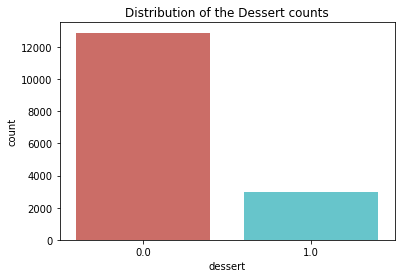

In [37]:
y = recipes_fil.dessert

sns.countplot(x = y, palette='hls')

plt.title("Distribution of the Dessert counts")
plt.show()

There's a lot many non-desserts than desserts. This is an example of an **imbalanced dataset**, where the target variables has many more of one category than another. Lets try to quantify this imbalance. 

In [50]:
is_dessert = y == 1
not_dessert = y == 0
total = y.count()

is_dessert_percent = round((y[is_dessert].count()/ total) * 100, 2)
not_dessert_percent = round((y[not_dessert].count()/ total) * 100, 2)

print("Percent of dessert : ", is_dessert_percent)
print("Percent of non - dessert: ", not_dessert_percent)

Percent of dessert :  18.61
Percent of non - dessert:  81.39


In [52]:
recipes_fil.groupby('dessert').mean()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
dessert,,,,,,,,,,,,,,,,,,,,,
0.0,3.748110,483.679023,24.640791,28.237611,812.905079,0.000000,0.000078,0.001163,0.001163,0.000543,...,0.001551,0.022102,0.000078,0.000388,0.017216,0.000155,0.000388,0.001241,0.000620,0.026134
1.0,3.814874,515.030190,6.672320,25.988467,222.051221,0.002035,0.000000,0.000000,0.001696,0.000000,...,0.000000,0.024084,0.000000,0.000000,0.001018,0.000000,0.000000,0.001696,0.001696,0.000000


Well you see straightaway that avg. calories are higher for desserts than for non-desserts. But not by much.  
Protein, sodium in lower in desserts.  
Yes you cannot have a salty dessert. Or can you ?  
Also do people rate sweeter stuff as higher ? Hmm... the sweeter it is , the happier you are when you rate ? 😉
  
  
    
Lets now look into **balancing** our target variable.  